예제 깃허브(https://github.com/choco9966/IEEE-CIS-Fraud-Detection)

**OverView**

# 1. EDA   


Feature들의 의미를 파악하고, 변수들의 특이점을 탐지하는 과정

    - 결측치 확인
    - 이상치 분포 확인
    - 익명화 변수 해석
    - 변수 간 상호작용 파악
    - 카드별 시계열 분석
    - 동일 유저군 추출
    - 유저군별 거래 패턴 확인


두 가지 카테고리의 데이터를 merge하는 코드
```
train_transaction = pd.read_csv('../input/train_transaction.csv')
train_identity = pd.read_csv('../input/train_identity.csv')

test_transaction = pd.read_csv('../input/test_transaction.csv')
test_identity = pd.read_csv('../input/test_identity.csv')

train_transaction = train_transaction.merge(train_identity, on=['TransactionID'],how='left')
test_transaction = test_transaction.merge(test_identity, on=['TransactionID'],how='left')
all_data = pd.concat([train_transaction,test_transaction])
```

**여러 가지 변수들을 조사하는 방법**
1. 타겟 변수(isFruad)   
  • 정답 분포가 어떻게 되는지, 또 다르다면 클래스의 비율을 맞추기 위해서\
  Up-Sampling이나 Down-Sampling 같은 기법을 사용할 것인지 아니면\
  StratifiedKFold 방식을 검증 전략으로 하여 사용할 것인지를 파악.

2. 시간 변수(TransactionDT)   
  • 초 단위로 이루어져 있는 시간 변수를 사람이 이해하기 쉬운\
날짜 변수로 변환하고, 각 시간별 거래량 추이가 어떻게 변하는지 등을 파악.
  
3. D 변수   
  • 별 다른 정보가 없는 변수의 경우에는 전체적으로 분포, 결측값 비율 등을\
  확인하고 특이한 변수가 있는지를 찾아내어 조사한다.

4. V 변수   
  • V 변수는 V001 ~ V300 까지의 많은 변수로 이루어져 있었으므로 이를 파악하기\
  위해서 전체 상관관계 분포 표를 그려서 데이터를 분석함.\
  이러한 데이터를 그룹으로 묶어 Aggregation한 Feature로 만들어서 쓰던가\
  아니면 PCA를 통해서 변수를 좀 줄여 사용한다.

# 2. Feature Engineering


    - Preprocessing

    - Normalization

    - Feature Aggregation(특성 생성)
      • 한 개 또는 여러 개의 카테고리 변수들을 그룹화 하고 그룹별로 다른
        연속형 변수들의 통곗값(평균,표준편차,최솟값,최댓값)을 Feature로 만든다.
        특성을 더욱 다양하게 표현하고, 변수 간 상호작용을 반영할 수 있게 해준다.
        유용한 특성들을 만들어보고 Metrics를 측정하면서 점수가 떨어지는건 버리고
        좋은건 남기면서 최적의 특성만 남긴다.

    - Count Encoding
      • 피처 엔지니어링 기법 중 대표적으로 쓰이는 기법.
        [A,B,B,C,C,C]를 [1,2,2,3,3,3]으로 바꿔줌
      • 변수의 발생 빈도 수에서 드러나는 패턴이 의미가 있을때 모델에 도움을 줌
        예를 들면 '사람들이 많이 쓰는 카드 종류일수록 사기 비율이 낮다'라는
        가정을 채택할때 Count Encoding으로 이를 적용할 수 있다.

    - Mean Encoding(Target Encoding)
      • 범주형 변수가 많은 데이터셋에서 모델에 많은 정보 제공 가능
      • 샘플 수가 적은 범주에서 과적합 위험 가능성
      • 평균값 계산 시 정규화나 스무딩 기법을 사용 가능

    - LDA/NMF
      • Latent Dirichlet Allocation
        텍스트 문서를 다양한 주제(Topic)이 섞여있다고 가정하고
        어떤 단어를 각 주제를 특정 단어의 분포로 표현하거나, 특정 단어가
        어떤 주제에 가장 확률적으로 높게 배치되어있는지 파악
        혹은, 2D 평면에서 선형분류 문제처럼 두 샘플을 줄 긋는데에도 사용 가능
      • Non-negative Matrix Factorization
        복잡한 데이터 행렬을 단순한 두 개의 행렬로 분해하는 것(모든 데이터가
        양수) 텍스트 데이터 혹은 이미지 데이터에도 사용이 가능하다.

    Feature Selection
    - Forward Feature Selection
      • Feature가 없는 상태에서 Feature를 하나씩 추가시키면서 모델의
        성능을 평가하는 방법.

    - Recursive Feature Elimination (RFE)  
      • 특성 중요도를 얻은 다음, 특성 중요도가 낮은 특성부터 하나씩
        제거시켜보면서 모델의 성능을 측정하는 방법.

    - Adversarial Validation(적대적 유효성 검사)
      • train set과 test set을 합치고 train set에는 0을 test set에는 1 레이블을
        할당해서 모델을 훈련시킨다. 만약 그 모델의 성능이 좋다면(즉 train set과
        test set을 잘 구별한다면)그 데이터 셋은 훈련 데이터와 테스트 데이터가
        비슷하지 않다는 것을 의미하고, 이대로 훈련했을때 모델이 훈련 데이터에
        과적합될 위험을 내포하고 있다는 것을 말한다.

        또한 반대로 해석할 수도 있다. 예를 들어 훈련 세트에는 비교적 과거 데이터
        가 있고 테스트 세트에는 최신 데이터가 있다고 가정할때 이 모델의
        특성 중요도는 기존 가입자와 신규 가입자를 구분하는 가장 중요한 특성들이
        무엇인지를 알려준다고 볼 수 있기 때문이다.

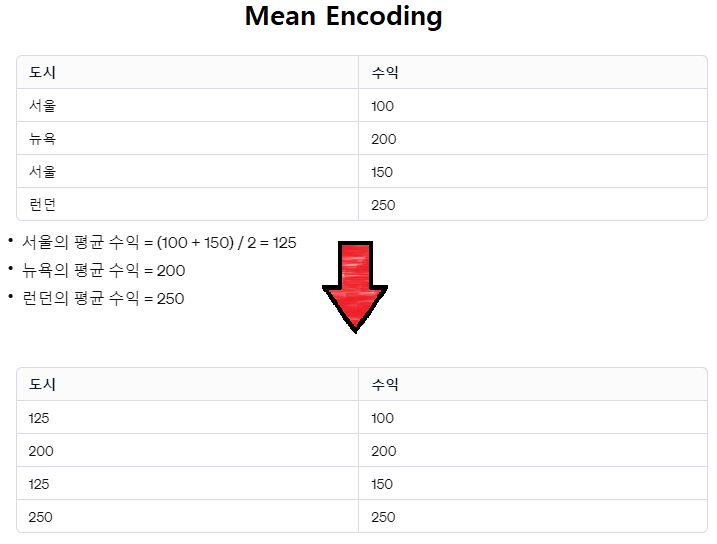

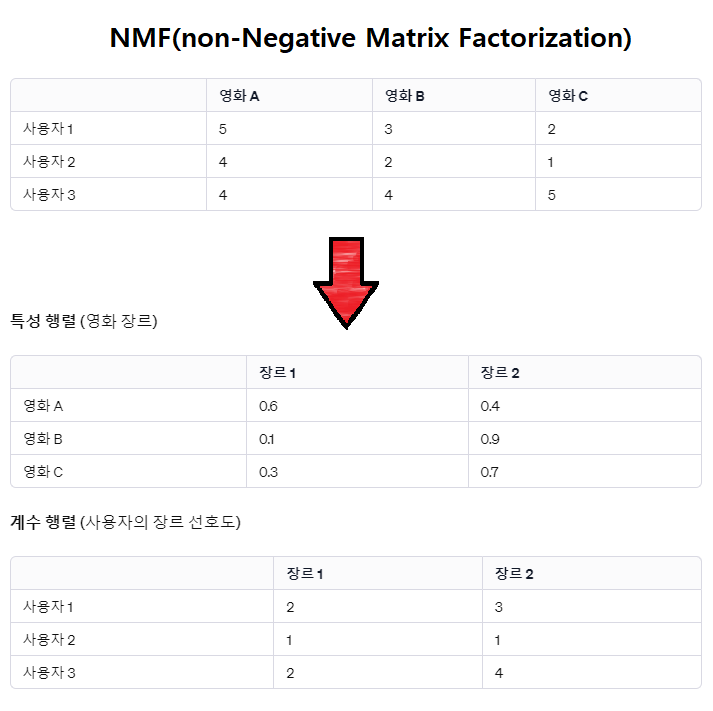

LDA이란 텍스트 문서에서 단어들이 어떤 토픽으로 이루어져 있고 각 토픽을 특정 단어의 분포로 표현하는걸 말하고   
NMF는 복잡한 데이터를 더 이해하기 쉬운 두 개의 행렬로 분해하여 데이터를 더 간단하게 파악할 수 있게 해주는 도구로 아래 이미지와 같이 원본 행렬을 분해한다.   
**LDA, NMF 모두 사이킷런 라이브러리로 제공된다.**
```
from sklearn.decomposition import LatentDirichletAllocation as LDA
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import NMF
# 텍스트 데이터 로드
text_data = ['문서1의 텍스트', '문서2의 텍스트', ...]

# CountVectorizer를 사용하여 텍스트 데이터를 수치화
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(text_data)
```
**LDA 모델 훈련**
```
# LDA 모델 생성 및 학습
lda = LDA(n_components=5, random_state=42)
lda.fit(X)

# 주제와 주요 단어들 출력
feature_names = vectorizer.get_feature_names()
for topic_idx, topic in enumerate(lda.components_):
    print(f"Topic {topic_idx}:")
    print(" ".join([feature_names[i] for i in topic.argsort()[:-11:-1]]))
```
**NMF 모델 훈련**
```
# NMF 모델 생성 및 학습
nmf = NMF(n_components=5, random_state=42)
nmf.fit(X_tfidf)

# 주제와 주요 단어들 출력
feature_names = tfidf_vectorizer.get_feature_names()
for topic_idx, topic in enumerate(nmf.components_):
    print(f"Topic {topic_idx}:")
    print(" ".join([feature_names[i] for i in topic.argsort()[:-11:-1]]))
```

# 3. Ensemble Model

**LightGBM, Catboost, XGBoost Ensemble**


    - 검증 방법 선정
      • Kflod : 가장 단순한 Fold
      • Timeseries Split : 데이터를 시간 순서대로 늘려가며 진행(시계열에 적합)
      • GroupKFold : 특정 그룹에 대한 데이터가 훈련 세트와 검증 세트에 동시에
                     들어가지 않도록 설정, 데이터 간 상관관계가 있을때
                     모델이 그 특성에 과적합 되지 않도록 해줌.
      • StratifiedKfold : 클래스 비율이 불균형할 때 편향을 방지하기 위해 사용

**GropuKFlod, lightgbm을 사용한 코드**

```
변수 설정
NFOLD: 교차 검증에 사용할 fold의 수
split_groups: 교차 검증에서 그룹으로 사용할 열
aucs: 각 fold의 AUC 점수를 저장할 리스트
feature_importances: 모델의 특성 중요도를 저장할 데이터프레임
oofs: 검증 데이터셋에 대한 모델의 예측값을 저장할 배열
preds: 테스트 데이터셋에 대한 모델의 예측값을 저장할 배열

교차 검증 및 모델 학습
GroupKFold.split: 교차 검증을 위한 인덱스. X와 y는 특성과 타겟 변수이며, groups=split_groups는 그룹을 지정합니다.
lgb.Dataset: LightGBM 모델을 학습하기 위한 데이터셋을 생성합니다.
lgb.train: LGB파라미터, 훈련 데이터, 훈련 반복 횟수,
           검증데이터, 검증값 출력할 간격, 조기 종료

예측 및 특성 중요도:
feature_importances['fold_{}'.format(fold + 1)]: 각 fold에서의 특성 중요도를 기록.

성능 평가:
aucs.append: 각 fold의 최적 AUC 점수를 리스트에 추가.
roc_auc_score: 모든 fold에 대한 예측값(oofs)을 사용하여 전체 AUC 점수를 계산.

```


```
from time import time
from sklearn.model_selection import KFold, StratifiedKFold, TimeSeriesSplit, GroupKFold

NFOLD = 6
folds =  GroupKFold(n_splits=NFOLD)
split_groups = train_df['DT_M']

aucs = list()
feature_importances = pd.DataFrame()
feature_importances['feature'] = X.columns
oofs = np.zeros(len(train_df))
preds = np.zeros(len(test_df))

training_start_time = time()
for fold, (trn_idx, test_idx) in enumerate(folds.split(X, y, groups = split_groups)):
    start_time = time()
    print('Training on fold {}'.format(fold + 1))
    
    trn_data = lgb.Dataset(X.iloc[trn_idx], label=y.iloc[trn_idx])
    val_data = lgb.Dataset(X.iloc[test_idx], label=y.iloc[test_idx])
    clf = lgb.train(params, trn_data, 10000, valid_sets = [trn_data, val_data], verbose_eval=500, early_stopping_rounds=100)
    oofs[test_idx] = clf.predict(X.iloc[test_idx])
    preds += clf.predict(test)/NFOLD
    
    feature_importances['fold_{}'.format(fold + 1)] = clf.feature_importance()
    aucs.append(clf.best_score['valid_1']['auc'])
    
    print('Fold {} finished in {}'.format(fold + 1, str(datetime.timedelta(seconds=time() - start_time))))
print('-' * 30)
print('Training has finished.')
print('Total training time is {}'.format(str(datetime.timedelta(seconds=time() - training_start_time))))
print('Mean AUC:', np.mean(aucs))
print("Total Validation: ", roc_auc_score(y, oofs))
print('-' * 30)
```
**그 다음 특성 중요도를 출력한다**
```
1. feature_importances에 average 열을 추가한다.
   여기에는 각 fold마다 계산된 feature들의 특성 중요도 평균이 들어있다.
2. Seaborn 라이브러리로 특성 중요도를 막대 그래프로 시각화한다.
   이때 평균 중요도가 높은 순서대로 정렬하고 상위 50개만 출력한다.
```
```
feature_importances['average'] = feature_importances[['fold_{}'.format(fold + 1) for fold in range(folds.n_splits)]].mean(axis=1)
feature_importances.to_csv('feature_importances.csv')

plt.figure(figsize=(16, 16))
sns.barplot(data=feature_importances.sort_values(by='average', ascending=False).head(50), x='average', y='feature');
plt.title('50 TOP feature importance over {} folds average'.format(folds.n_splits));
```